In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


TVDI = pd.read_csv('/data/TVDI_model.csv')

In [29]:
#Analsiis dataframe
TVDI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10014 entries, 0 to 10013
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              10014 non-null  object 
 1   Hora              10014 non-null  object 
 2   Mes               10014 non-null  int64  
 3   Campanya          10014 non-null  int64  
 4   EAM               10014 non-null  object 
 5   id_pol            10014 non-null  int64  
 6   cat_cultiu        10014 non-null  object 
 7   T                 10014 non-null  float64
 8   Tmax              10014 non-null  float64
 9   Tmin              10014 non-null  float64
 10  H                 10014 non-null  int64  
 11  I                 10014 non-null  float64
 12  Evo               10014 non-null  float64
 13  v                 10014 non-null  float64
 14  Precipitacio_dia  10014 non-null  float64
 15  TVDI              10014 non-null  float64
dtypes: float64(8), int64(4), object(4)
memor

Assigna Kc segons el mes, seguint el patró NDVI observat per l’avellaner, i base bibliografica.

In [30]:
#Funció per l'assignació de valors per la nova varaible
def assignar_kc(mes):
    if mes == 1:  # Gener
        return 0.0
    elif mes == 2:  # Febrer
        return 0.2
    elif mes == 3:  # Març
        return 0.3
    elif mes == 4:  # Abril
        return 0.5
    elif mes == 5:  # Maig
        return 0.55
    elif mes == 6:  # Juny
        return 0.6
    elif mes == 7:  # Juliol
        return 0.7
    elif mes == 8:  # Agost
        return 0.60
    elif mes == 9:  # Setembre
        return 0.4
    elif mes == 10:  # Octubre
        return 0.30
    elif mes == 11:  # Novembre
        return 0.0
    elif mes == 12:  # Desembre
        return 0.0
    else:
        return np.nan

# Aplica la funció al teu DataFrame
TVDI['Kc'] = TVDI['Mes'].apply(assignar_kc)
TVDI['ETc'] = TVDI['Kc'] * TVDI['Evo']
TVDI = TVDI.drop('Kc', axis=1)

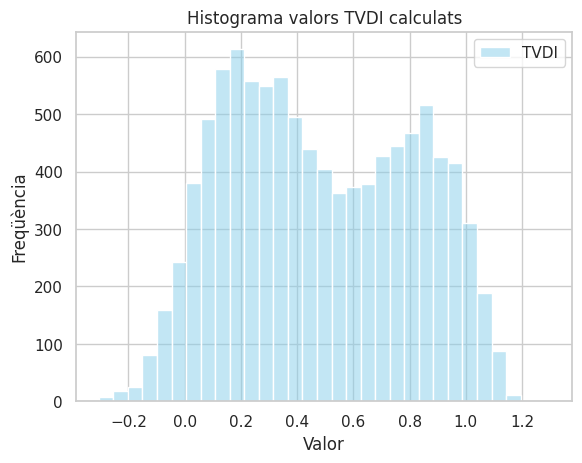

In [31]:
# histograma TVDI calculcats

columnes = ['TVDI']

for columna in columnes:
    sns.histplot(TVDI[columna], label=columna, kde=False, alpha=0.5, color='skyblue')

plt.xlabel('Valor')
plt.ylabel('Freqüència')
plt.title('Histograma valors TVDI calculats')
plt.legend()
plt.show()

In [32]:
#Eliminem valors fora del rang 0-1
TVDI_filtred = TVDI[(TVDI['TVDI'] >= 0) & (TVDI['TVDI'] <= 1)]

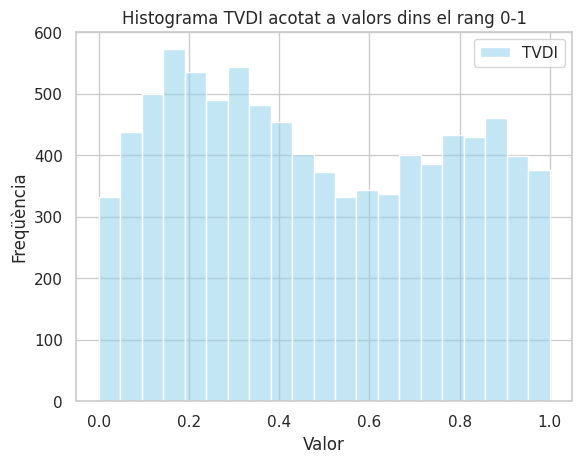

In [33]:
#histograma TVSi calculat sense valors fora de rang.

columnes = ['TVDI']

for columna in columnes:
    sns.histplot(TVDI_filtred[columna], label=columna, kde=False, alpha=0.5, color='skyblue')  # kde=False per evitar la línia de densitat

plt.xlabel('Valor')
plt.ylabel('Freqüència')
plt.title('Histograma TVDI acotat a valors dins el rang 0-1')
plt.legend()
plt.show()

In [34]:
#Creació de la variable VDP a partride fòrmula referenciada
TVDI_filtred['es'] = 0.611 * np.exp(17.27 * TVDI_filtred['T'] / (TVDI_filtred['T'] + 237.3))
TVDI_filtred['VPD'] = (1 - TVDI_filtred['H'] / 100) * TVDI_filtred['es']
TVDI_filtred = TVDI_filtred.drop('es', axis=1)
TVDI_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9012 entries, 0 to 10013
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Data              9012 non-null   object 
 1   Hora              9012 non-null   object 
 2   Mes               9012 non-null   int64  
 3   Campanya          9012 non-null   int64  
 4   EAM               9012 non-null   object 
 5   id_pol            9012 non-null   int64  
 6   cat_cultiu        9012 non-null   object 
 7   T                 9012 non-null   float64
 8   Tmax              9012 non-null   float64
 9   Tmin              9012 non-null   float64
 10  H                 9012 non-null   int64  
 11  I                 9012 non-null   float64
 12  Evo               9012 non-null   float64
 13  v                 9012 non-null   float64
 14  Precipitacio_dia  9012 non-null   float64
 15  TVDI              9012 non-null   float64
 16  ETc               9012 non-null   float64
 17 

<ipython-input-34-09890f268224>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TVDI_filtred['es'] = 0.611 * np.exp(17.27 * TVDI_filtred['T'] / (TVDI_filtred['T'] + 237.3))
<ipython-input-34-09890f268224>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TVDI_filtred['VPD'] = (1 - TVDI_filtred['H'] / 100) * TVDI_filtred['es']


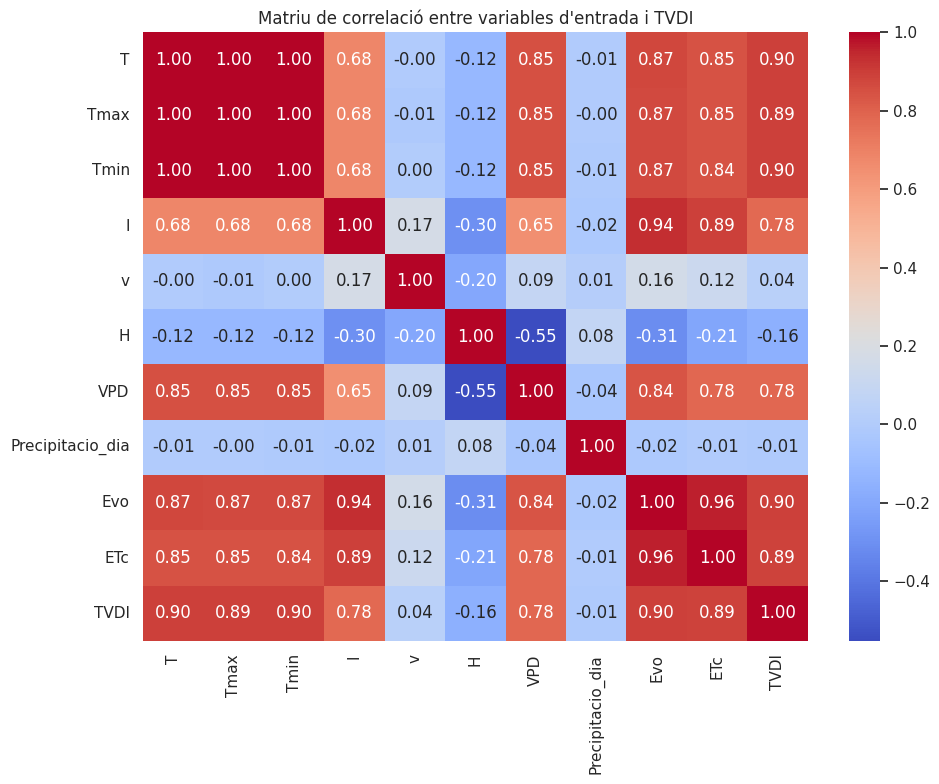

In [35]:
# Matriu de Correlació

sns.set(style="whitegrid")

# Selecció de les variables meteorologiques EMA
variables = ['T', 'Tmax', 'Tmin','I', 'v', 'H', 'VPD' , 'Precipitacio_dia', 'Evo', 'ETc','TVDI']

# Càlcul de la matriu de correlació
correlation_matrix = TVDI_filtred[variables].corr()

# Visualització
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriu de correlació entre variables d'entrada i TVDI")
plt.tight_layout()
plt.show()

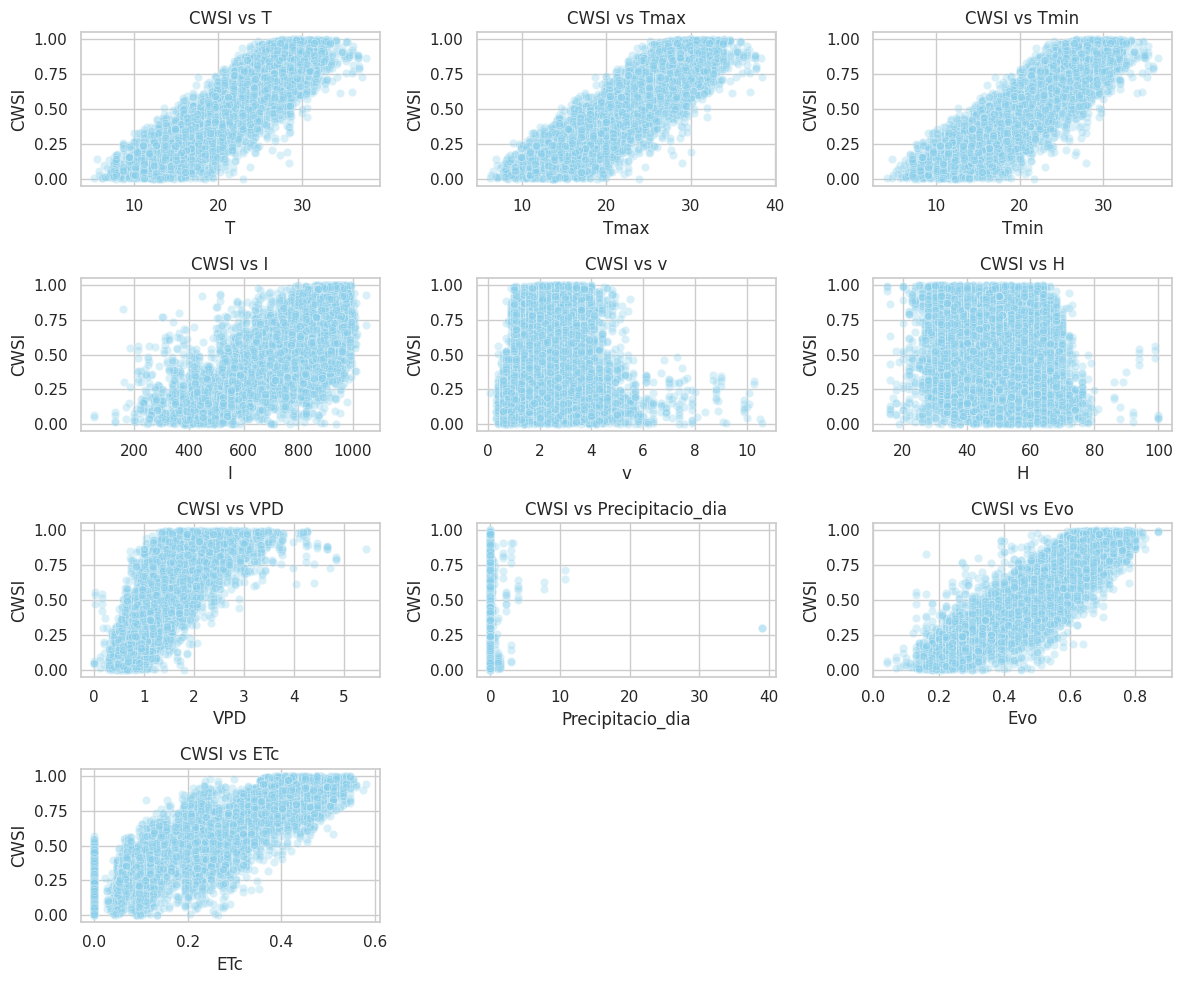

In [36]:
# GRafiques de dispersio de varaibles
sns.set(style="whitegrid")

# Selecció de les variables meteorologiques EMA
variables = ['T', 'Tmax', 'Tmin','I', 'v', 'H', 'VPD' , 'Precipitacio_dia', 'Evo', 'ETc']

# Gràfics de dispersió entre variables
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")


num_vars = len(variables)
num_rows = int(np.ceil(num_vars / 3))
num_cols = 3

for i, var in enumerate(variables, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.scatterplot(data=TVDI_filtred, x=var, y='TVDI', alpha=0.3, color='skyblue')
    plt.title(f'CWSI vs {var}')
    plt.xlabel(var)
    plt.ylabel('CWSI')

plt.tight_layout()
plt.show()

In [37]:
# Selecció de caracteristiques
from sklearn.feature_selection import f_regression
import pandas as pd

X = TVDI_filtred[['T', 'Tmax', 'Tmin','I', 'v', 'H', 'VPD' , 'Precipitacio_dia', 'Evo', 'ETc','TVDI']]
y = TVDI_filtred['TVDI']

X = X.fillna(X.mean())

# Avaluació univariada amb test F
f_scores, p_values = f_regression(X, y)

# Resultats en un DataFrame
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values(by='F_score', ascending=False)

print(feature_importance)

            Variable       F_score       p_value
8                Evo  3.706665e+04  0.000000e+00
0                  T  3.654350e+04  0.000000e+00
2               Tmin  3.644923e+04  0.000000e+00
1               Tmax  3.625252e+04  0.000000e+00
9                ETc  3.316792e+04  0.000000e+00
6                VPD  1.416686e+04  0.000000e+00
3                  I  1.396819e+04  0.000000e+00
5                  H  2.365540e+02  1.033861e-52
4                  v  1.118335e+01  8.287152e-04
7   Precipitacio_dia  4.160628e-01  5.189246e-01
10              TVDI -1.560670e+18  1.000000e+00


In [42]:
#ANOVA variable categòrica Clima
EVO_cleaned_for_analysis = TVDI_filtred.dropna(subset=['TVDI'])

categorical_vars_to_analyze = ['cat_cultiu']

for cat_var in categorical_vars_to_analyze:
    formula = f'TVDI ~ C({cat_var})'
    model = ols(formula, data=EVO_cleaned_for_analysis).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f"\nANOVA for '{cat_var}':")
    print(anova_table)


ANOVA for 'cat_cultiu':
                   sum_sq      df          F        PR(>F)
C(cat_cultiu)    5.539718     5.0  13.404251  4.777267e-13
Residual       744.401104  9006.0        NaN           NaN


In [ ]:
TVDI_filtred.to_csv('/data/TVDI_model_clear.csv', index=False)